# **Analysis of Shopping Cart Data**

This project seeks to apply Data Analysis skills to a shopping cart dataset and draw several cruicial insights from it.

There are several deductions and analyses that can be drawn from this data.

Including:

1. Which products were sold the most in the last month?
2. How have sales and revenue changed over the past few quarters?
3. Understanding Customer demographics and their preferences





In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')


###Loading the Dataset

In [2]:
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

In [3]:
customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [4]:
orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [5]:
sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


In [6]:
products.head()

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


##Merging data
Let's merge customers, orders, and product data to form one file since it's have the same rows.

In [7]:
#first merge customer and order
cust_order = pd.merge(left=customers, right=orders,
                      left_index=True, right_index=True) # merging
#then merge the result with product
cop_data = pd.merge(left=cust_order, right=products,
                    left_index=True, right_index=True) # merging

In [8]:
cop_data.tail()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,...,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73,"A green coloured, XS sized, Wool Trousers"
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,...,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43,"A green coloured, S sized, Wool Trousers"
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,...,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41,"A green coloured, M sized, Wool Trousers"
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,...,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers"
999,1000,Mandel Fairbanks,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,1000,...,2021-4-7,2021-04-24,999,Trousers,Wool,XL,green,111,48,"A green coloured, XL sized, Wool Trousers"


In [9]:
cop_data['customer_id_y']

0       64
1      473
2      774
3      433
4      441
      ... 
995    345
996    346
997    407
998    428
999    896
Name: customer_id_y, Length: 1000, dtype: int64

##Brief Info about Dataset

In [10]:
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_ID     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


##Checking for Missing values

In [12]:
cop_data.isna().sum()

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
customer_id_y    0
payment          0
order_date       0
delivery_date    0
product_ID       0
product_type     0
product_name     0
size             0
colour           0
price            0
quantity         0
description      0
dtype: int64

In [13]:
sales.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

##Checking Categorical Variables

In [14]:
categorical = cop_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {cop_data[cat_col].nunique()} unique variable(s)")

customer_name : 1000 unique variable(s)
gender : 8 unique variable(s)
home_address : 1000 unique variable(s)
city : 961 unique variable(s)
state : 8 unique variable(s)
country : 1 unique variable(s)
order_date : 291 unique variable(s)
delivery_date : 305 unique variable(s)
product_type : 3 unique variable(s)
product_name : 28 unique variable(s)
size : 5 unique variable(s)
colour : 7 unique variable(s)
description : 1000 unique variable(s)


##Checking Discrete and Continuous Variables
Let's have a look at Discrete and Continuous variables.

In [15]:
numeric = sales.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {sales[num_col].nunique()} uniqueness variable(s)")

sales_id : 5000 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)


##Convert Order Date column
let's convert Order Date column too, so we can take the Year, Month, and the other date easily.

In [16]:
# Convert it using to_datetime() function
cop_data["order_date"], cop_data["delivery_date"] = pd.to_datetime(cop_data["order_date"]), pd.to_datetime(cop_data["delivery_date"])
# Let's see it
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

In [17]:
cop_data.dtypes

customer_id_x             int64
customer_name            object
gender                   object
age                       int64
home_address             object
zip_code                  int64
city                     object
state                    object
country                  object
order_id                  int64
customer_id_y             int64
payment                   int64
order_date       datetime64[ns]
delivery_date    datetime64[ns]
product_ID                int64
product_type             object
product_name             object
size                     object
colour                   object
price                     int64
quantity                  int64
description              object
dtype: object

##Recap of Dataset So Far.
These are some point that we have.

1. Costumer, Order, and Products Data:
2. We have total  1000  rows and  22  columns
3. There's no missing value(s)
4. customer_name :  1000  uniqueness variable(s)
5. gender :  8  uniqueness variable(s)
6. home_address :  1000  uniqueness variable(s)
7. city :  961  uniqueness variable(s)
8. state :  8  uniqueness variable(s)
9. country :  1  uniqueness variable(s)
10. order_date :  291  uniqueness variable(s)
11. delivery_date :  305  uniqueness variable(s)
12. product_type :  3  uniqueness variable(s)
13. product_name :  28  uniqueness variable(s)
15. size :  5  uniqueness variable(s)
16. colour :  7  uniqueness variable(s)
17. description :  1000  uniqueness variable(s)

##Sales Data:
1. There's no missing value(s)
2. It's not have a uniqueness value(s)
3. All data type in these data is Int 64


Next, we will try to do some exploration and visualization. But we need to do some Data Preparation first.

##**Data Preparation**

In [18]:
cop_data["sales"] = cop_data["price"] * cop_data["quantity"] # let's make a sales dataa and add to cop_data
cop_data.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358


### Add order year, month and day to cop_data.

In [19]:
# let's get the year data in order date column
cop_data['year_order'] = cop_data['order_date'].dt.year

# let's get the month data in order date column
cop_data['month_order'] = cop_data['order_date'].dt.month

# Let's get the day data in order date column
cop_data["day_order"] = cop_data["order_date"].dt.day

In [20]:
cop_data

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156,2021,10,8
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866,2021,5,6
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358,2021,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,...,Wool,XS,green,111,73,"A green coloured, XS sized, Wool Trousers",8103,2021,1,13
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,...,Wool,S,green,111,43,"A green coloured, S sized, Wool Trousers",4773,2021,1,18
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,...,Wool,M,green,111,41,"A green coloured, M sized, Wool Trousers",4551,2021,5,5
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,...,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers",4662,2021,6,15


### Add delivery year, month and day to cop_data.

In [21]:
# let's get the year data in delivery date column
cop_data['year_delivery'] = cop_data['delivery_date'].dt.year

# let's get the month data in delivery date column
cop_data['month_delivery'] = cop_data['delivery_date'].dt.month

# Let's get the day data in delivery date column
cop_data["day_delivery"] = cop_data["delivery_date"].dt.day

In [22]:
cop_data.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3,2021,2,13
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156,2021,10,8,2021,11,3
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866,2021,5,6,2021,5,19
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358,2021,3,23,2021,3,24


##**Data Analysis and Visualization (EDA)**

###Correlation Between and among the cop_data

In [23]:
cop_data.corr()

,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
customer_id_x,1.000000,-0.014139,-0.005076,1.000000,-0.022171,0.021371,1.000000,-0.026326,0.028475,0.015294,NaN,0.003044,-0.006297,NaN,0.006917,-0.029787
age,-0.014139,1.000000,0.007172,-0.014139,-0.023312,0.023016,-0.014139,0.099371,0.009290,0.047032,NaN,-0.005943,0.029278,NaN,-0.000415,-0.002955
zip_code,-0.005076,0.007172,1.000000,-0.005076,0.016459,-0.010635,-0.005076,-0.026890,-0.001284,-0.010807,NaN,-0.034242,0.016040,NaN,-0.032085,-0.021526
order_id,1.000000,-0.014139,-0.005076,1.000000,-0.022171,0.021371,1.000000,-0.026326,0.028475,0.015294,NaN,0.003044,-0.006297,NaN,0.006917,-0.029787
customer_id_y,-0.022171,-0.023312,0.016459,-0.022171,1.000000,-0.018983,-0.022171,-0.026639,-0.040304,-0.047699,NaN,-0.019109,-0.025076,NaN,-0.017126,0.015662
payment,0.021371,0.023016,-0.010635,0.021371,-0.018983,1.000000,0.021371,0.035527,0.000472,0.011012,NaN,0.035346,-0.004933,NaN,0.031200,-0.009126
product_ID,1.000000,-0.014139,-0.005076,1.000000,-0.022171,0.021371,1.000000,-0.026326,0.028475,0.015294,NaN,0.003044,-0.006297,NaN,0.006917,-0.029787
price,-0.026326,0.099371,-0.026890,-0.026326,-0.026639,0.035527,-0.026326,1.000000,0.067180,0.450207,NaN,0.015518,-0.012084,NaN,0.017108,-0.021227
quantity,0.028475,0.009290,-0.001284,0.028475,-0.040304,0.000472,0.028475,0.067180,1.000000,0.918043,NaN,-0.011918,0.052903,NaN,-0.005132,-0.005756
sales,0.015294,0.047032,-0.010807,0.015294,-0.047699,0.011012,0.015294,0.450207,0.918043,1.000000,NaN,-0.001763,0.042621,NaN,0.004460,-0.012453


The correlation value is between -1 and 1, the closer the values to either 1 or -1, the higher the correlation. Exactly 1 or -1 represents perfect correlation. 0 represents no correlation.

**Note**:  You would expected NaN if the values do not vary. To see why take a look at correlation formula:

***cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]***

If the values of the *ith* or *jth* variable do not vary, then the respective standard deviation will be zero and so will the denominator of the fraction. Thus, the correlation will be NaN.

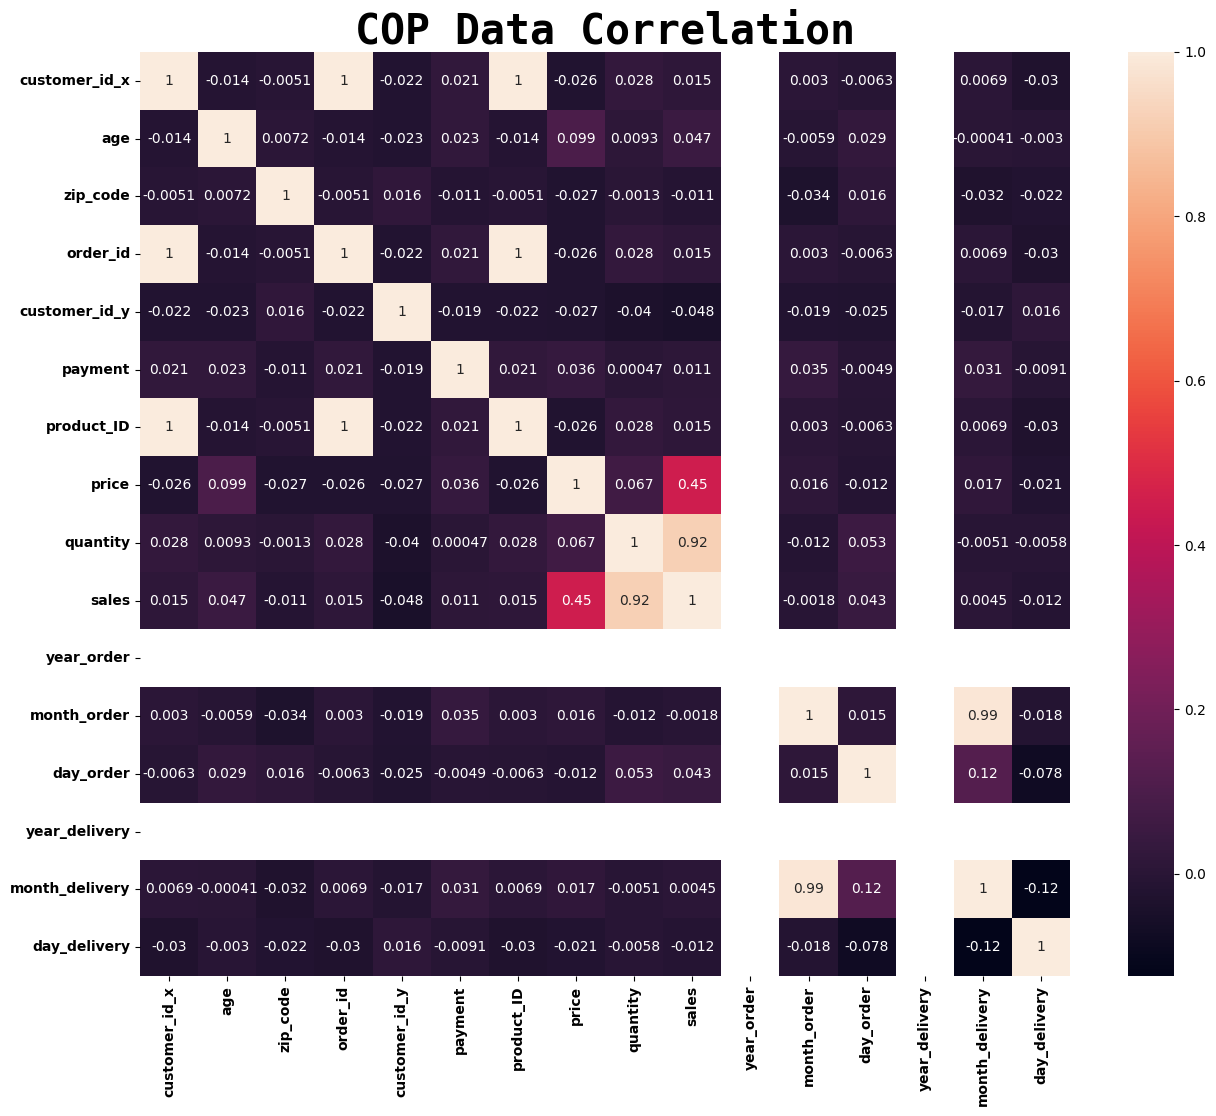

In [24]:
# sns.set_style("whitegrid") # set the seaborn style
# let's make a correlation matrix for `cop_data`
plt.figure(figsize=(15, 12)) # figure the size
sns.heatmap(cop_data.corr(), annot=True) # create a heatmap
plt.title("COP Data Correlation", weight="bold", fontsize=30, fontname="monospace") # title
plt.xticks(weight="bold", fontsize=10) # x-ticks
plt.yticks(weight="bold", fontsize=10); # y-ticks

We can see that some features appear to be highly correlated with each other. For instance: *Sales* and Price are highly correlated meaning one affects the other. If the price is high, sales will go down and vice-versa.

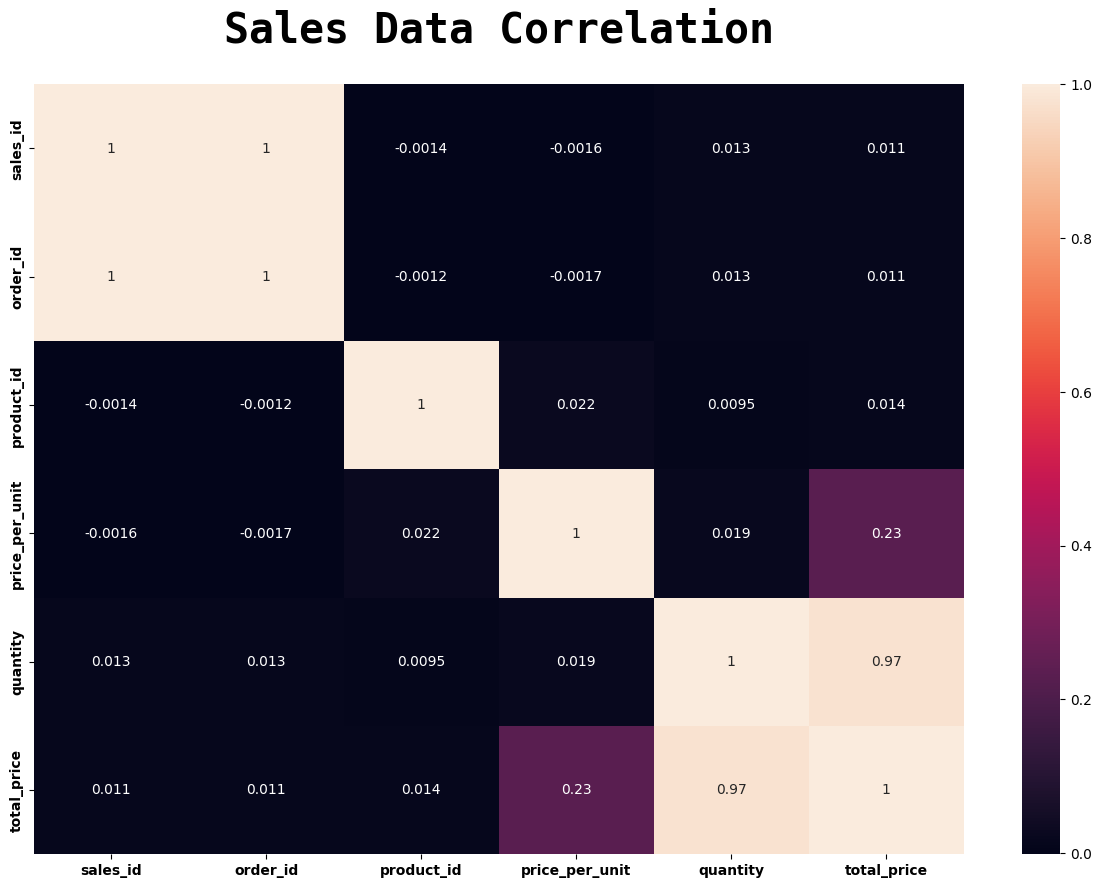

In [25]:
# let's make a correlation matrix for `sales`
plt.figure(figsize=(15, 10)) # figure the size
sns.heatmap(sales.corr(), annot=True) # construct the heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=10) # x-ticks
plt.yticks(weight="bold", fontsize=10); # y-ticks

##Statistical Measure

Let's have a look to the statistical measure in both of data

###The Five Number Summary of the data

In [26]:
cop_data.describe(include=[np.number])

,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000,500.500000,506.640000,33972.936000,499.500000,108.095000,60.371000,6532.937000,2021.0,5.376000,15.562000,2021.0,5.841000,15.508000
std,288.819436,17.647828,2884.497332,288.819436,277.115502,14451.609047,288.819436,9.158048,11.606812,1408.645064,0.0,2.847584,8.614776,0.0,2.907606,8.636813
min,1.000000,20.000000,2.000000,1.000000,1.000000,10043.000000,0.000000,90.000000,40.000000,3690.000000,2021.0,1.000000,1.000000,2021.0,1.000000,1.000000
25%,250.750000,34.000000,2401.750000,250.750000,275.250000,21329.250000,249.750000,102.000000,50.000000,5405.000000,2021.0,3.000000,8.000000,2021.0,3.000000,8.000000
50%,500.500000,50.000000,5083.000000,500.500000,515.000000,33697.500000,499.500000,112.000000,61.000000,6454.000000,2021.0,5.000000,16.000000,2021.0,6.000000,15.000000
75%,750.250000,65.000000,7460.250000,750.250000,737.250000,46249.000000,749.250000,115.000000,70.000000,7656.750000,2021.0,8.000000,23.000000,2021.0,8.000000,23.000000
max,1000.000000,80.000000,9998.000000,1000.000000,1000.000000,59910.000000,999.000000,119.000000,80.000000,9520.000000,2021.0,10.000000,31.000000,2021.0,11.000000,31.000000


In [27]:
cop_data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
customer_id_x,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
age,1000.0,49.860,17.647828,20.0,34.00,50.0,65.00,80.0
zip_code,1000.0,5004.872,2884.497332,2.0,2401.75,5083.0,7460.25,9998.0
order_id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
customer_id_y,1000.0,506.640,277.115502,1.0,275.25,515.0,737.25,1000.0
payment,1000.0,33972.936,14451.609047,10043.0,21329.25,33697.5,46249.00,59910.0
product_ID,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
price,1000.0,108.095,9.158048,90.0,102.00,112.0,115.00,119.0
quantity,1000.0,60.371,11.606812,40.0,50.00,61.0,70.00,80.0
sales,1000.0,6532.937,1408.645064,3690.0,5405.00,6454.0,7656.75,9520.0


In [28]:
sales.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
sales_id,5000.0,2499.5000,1443.520003,0.0,1249.75,2499.5,3749.25,4999.0
order_id,5000.0,503.0382,285.964418,1.0,258.00,504.5,749.00,999.0
product_id,5000.0,634.0532,363.255794,1.0,323.00,635.0,951.00,1259.0
price_per_unit,5000.0,103.5016,9.195004,90.0,95.00,102.0,112.00,119.0
quantity,5000.0,1.9924,0.807510,1.0,1.00,2.0,3.00,3.0
total_price,5000.0,206.3600,86.357457,90.0,112.00,204.0,285.00,357.0


##Univariate Data Analysis

In [29]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )


#TO CREATE 2 PLOTS BELOW : Distplot & ggplot
    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )

    ax1.set_title( # set the title 1
        title1,
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )

    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line
    )

    ax2.set_title( # set the title 2
        title2,
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )

    return fig # returning the figure

## Sales¶
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Sales Data, the  𝜇=6533  and the  𝜎=1409. You can calculate that using pandas mean() function on the sales data.
###Calculation:
*6533−2(1409)=3715*

*6533+2(1409)=9531*

i.e the mean minus 2 standard deviation and the mean plus 2 standard deviation.

###Interpretation:
At least  75%  of the Shopping Cart Database Sales customer population in Australia has sales ranging from  3715−9531  (Australian Dollars).

In [30]:
cop_data['sales'].mean()

6532.937

In [31]:
cop_data['sales'].std()

1408.6450638634797

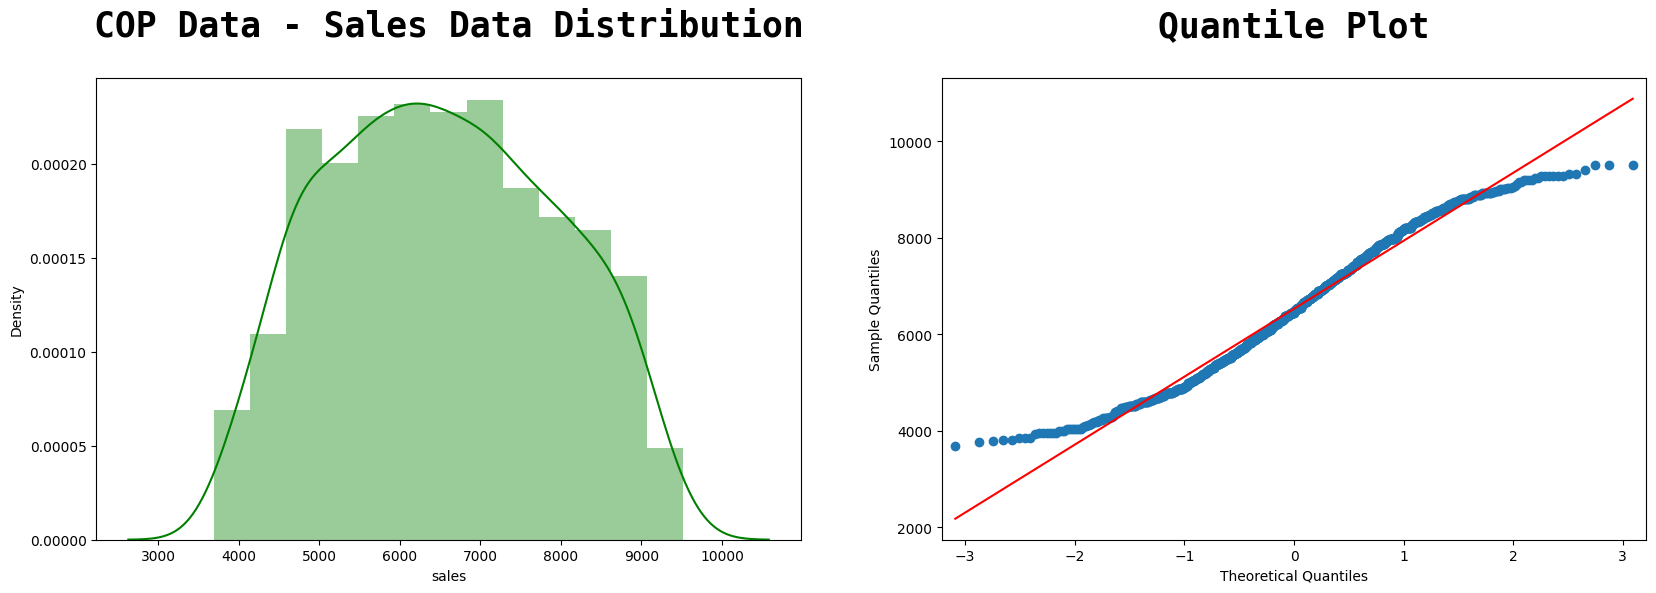

In [32]:
# Using the function on Sales Data
univariate_analysis( # call the function
    data=cop_data['sales'], # put the data
    color='green', # pick the color
    title1='COP Data - Sales Data Distribution', # title1
    title2='Quantile Plot'); #

<br>


##Age
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Age Data, the  𝜇=49.8  and the  𝜎=17.6.

####Calculation:
*49.8−2(17.6)=14.59*

*49.8+2(17.6)=85.0*

####Interpretation:
At least  75%  of the Shopping Cart Database customer population in Australia has an age range of  14−85  years.

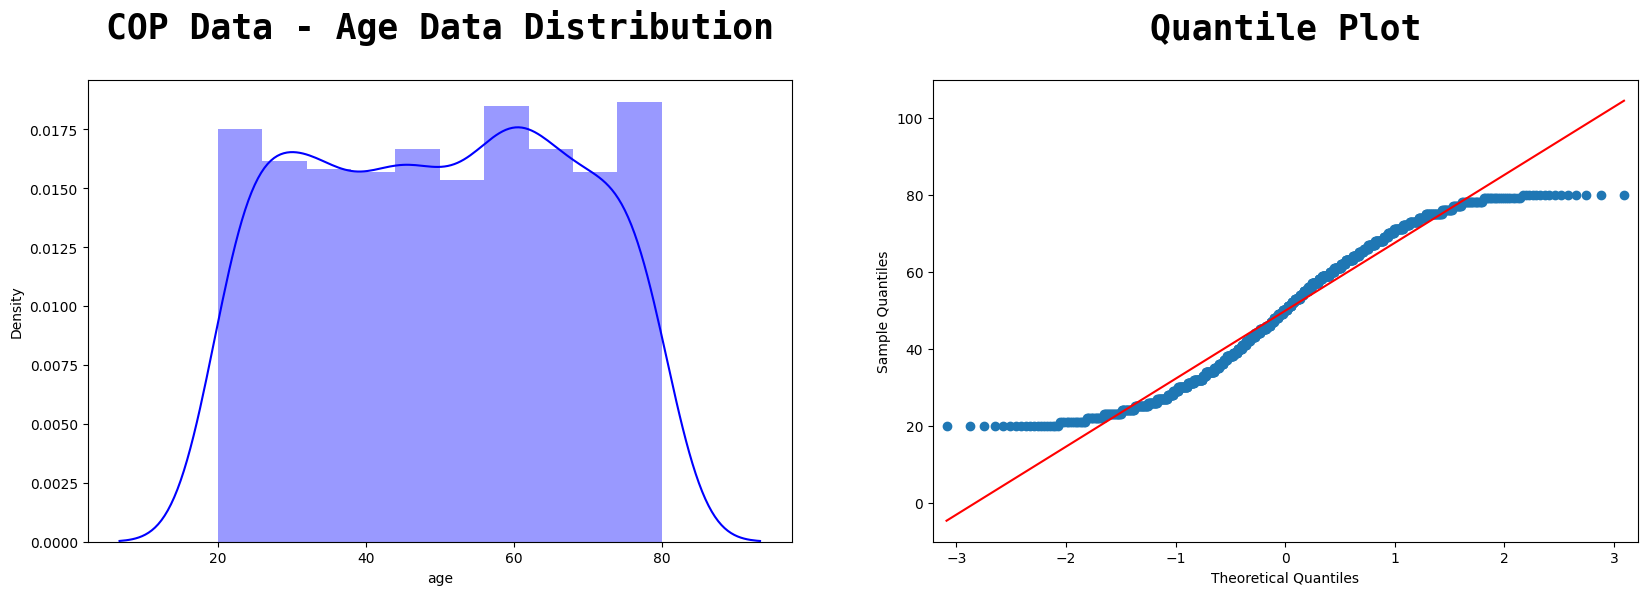

In [33]:
# Age Data
univariate_analysis( # call the function
    data=cop_data['age'], # put the data
    color='blue', # pick the color
    title1='COP Data - Age Data Distribution', # title1
    title2='Quantile Plot'); # title2

##Price
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Price Data, the  𝜇=108.095  and the  𝜎=9.15.

####Calculation:
*108.095−2(9.15)=89.795*

*108.095+2(9.15)=126.395*

####Interpretation:
At least  75%  of Shopping Cart population in the product price database in Australia has a price range from  89,795−126,395  (Australian Dollars).

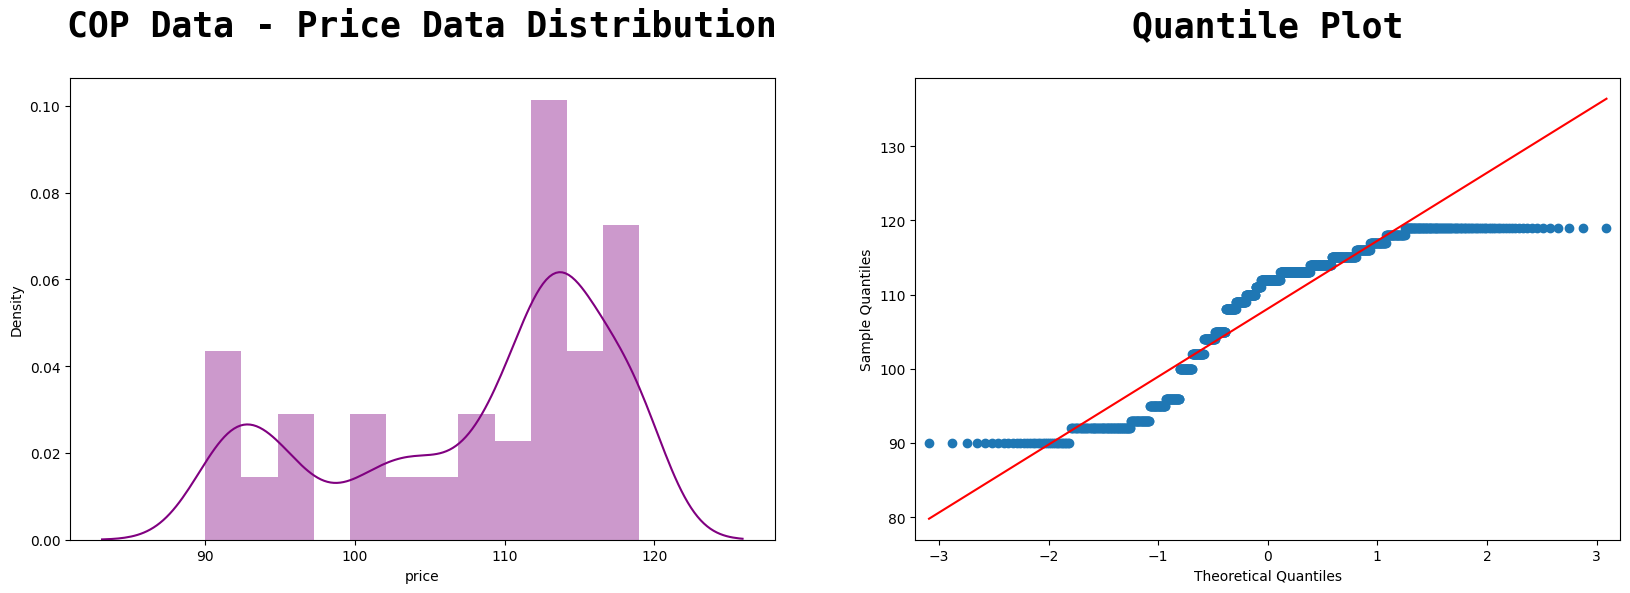

In [34]:
# Price Data
univariate_analysis( # call the function
    data=cop_data['price'], # put the data
    color='purple', # pick the color
    title1='COP Data - Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

##Quantity
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Quantity Data, the  𝜇=60.3  and the  𝜎=11.6

####Calculation:
*60.3−2(11.6)=37*

*60.3+2(11.6)=83.5*

####Interpretation:
At least  75%  of the Shopping Cart Database Quantity ordered population in Australia has a quantity range from  37−83.5  quantity ordered.

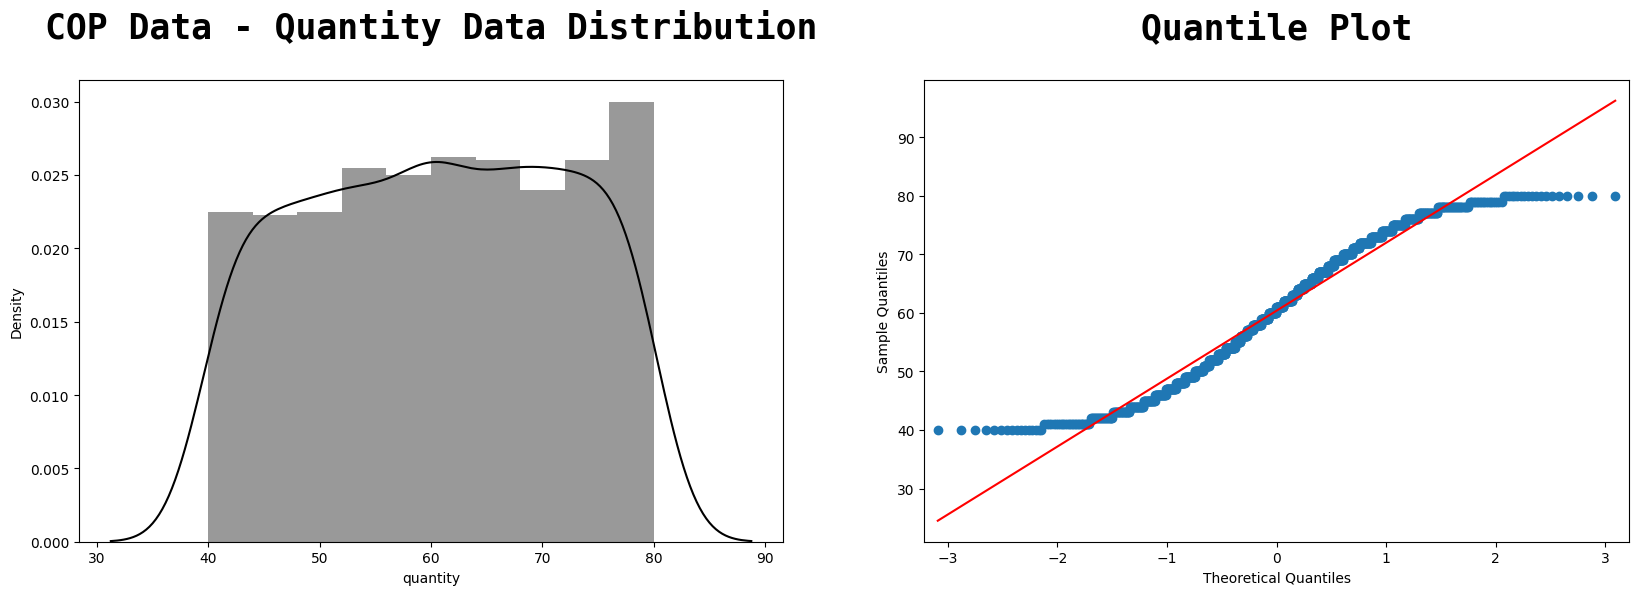

In [35]:
# Quantity Data
univariate_analysis( # call the function
    data=cop_data['quantity'], # put the data
    color='black', # pick the color
    title1='COP Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

<br>

##Price Per-Unit
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Price Per Unit Data, the  𝜇=103.5  and the  𝜎=9.1

####Calculation:

*103.5−2(9.1)=85.3*

*103.5+2(9.1)=121.7*

####Interpretation:
At least  75%  of the population of the Shopping Cart Database, the per unit price range is in between  85.3 to 121.7  (Australian Dollars).

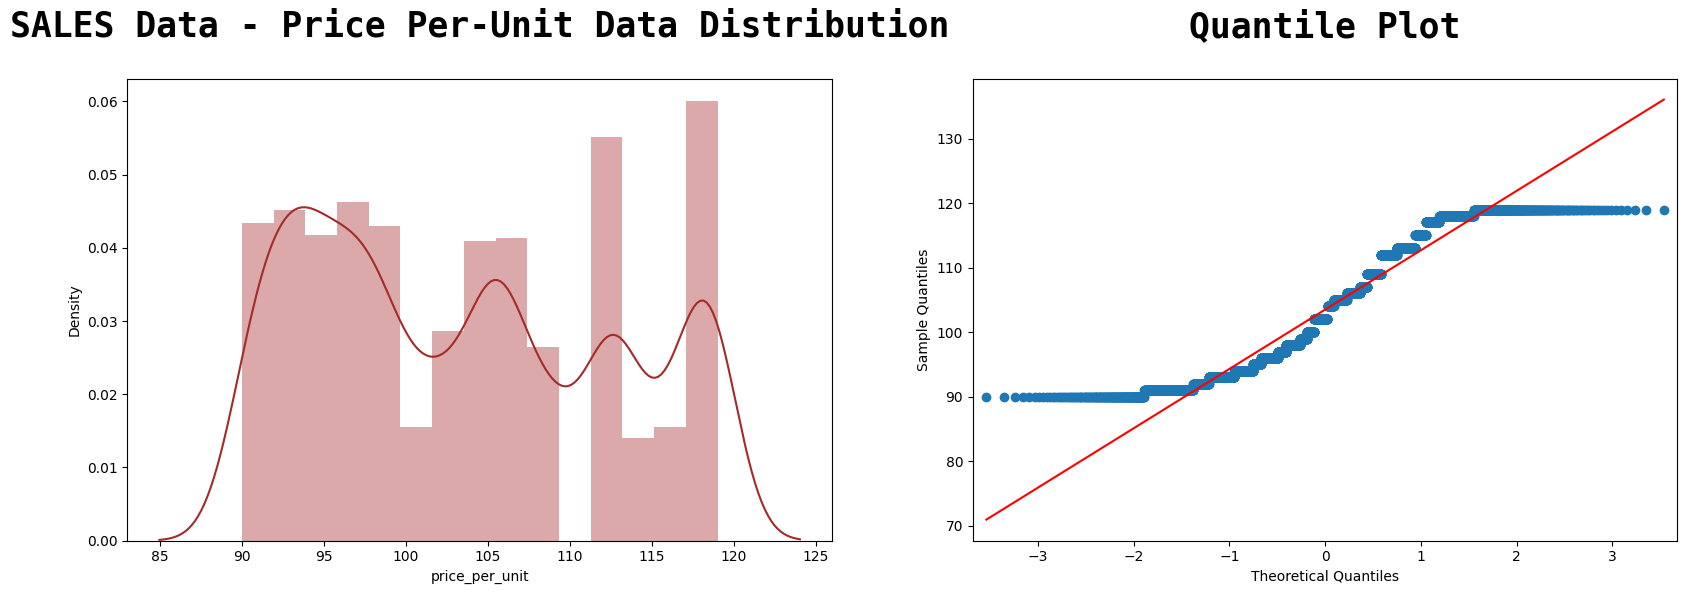

In [36]:
# Total Price Data
univariate_analysis( # call the function
    data=sales['price_per_unit'], # put the data
    color='brown', # pick the color
    title1='SALES Data - Price Per-Unit Data Distribution', # title1
    title2='Quantile Plot'); # title2

##Total Price
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Total Price Data, the  𝜇=206.3  and the  𝜎=86.3

####Calculation:
*206.3−2(86.3)=33.7*

*206.3+2(86.3)=378.9 *

###Interpretation:
At least  75%  of the sales data has a total price range from  33.7 to 378.9  (Australian Dollars).

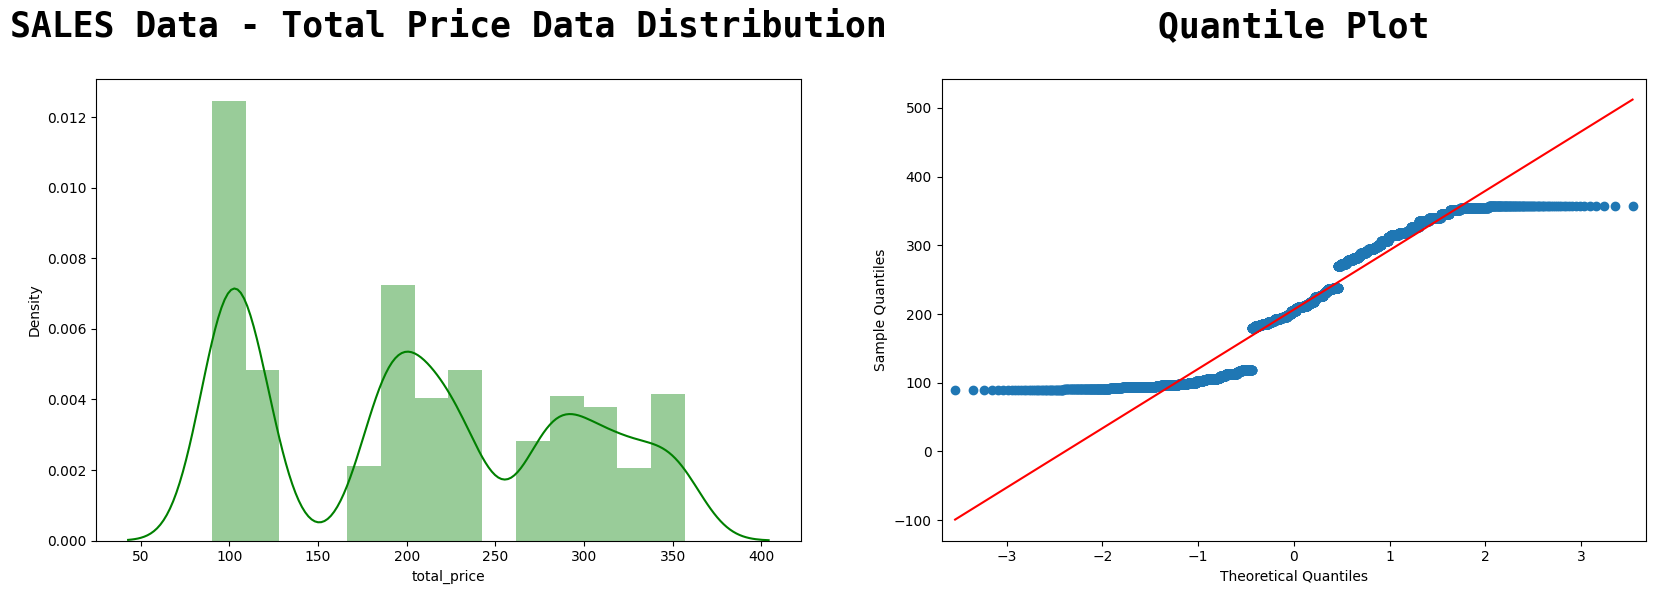

In [37]:
# Price Data
univariate_analysis( # call the function
    data=sales['total_price'], # put the data
    color='green', # pick the color
    title1='SALES Data - Total Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

##Quantity
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. and In the Quantity Data, the  𝜇=2  and the  𝜎=1 , if we round it.

#### Calculation:
*2−2(1)=0*

*2+2(1)=4*

####Interpretation:
At least  75%  of the population of Shopping Cart Database Quantity ordered in Australia has a total quantity range from  0−4  quantity ordered.

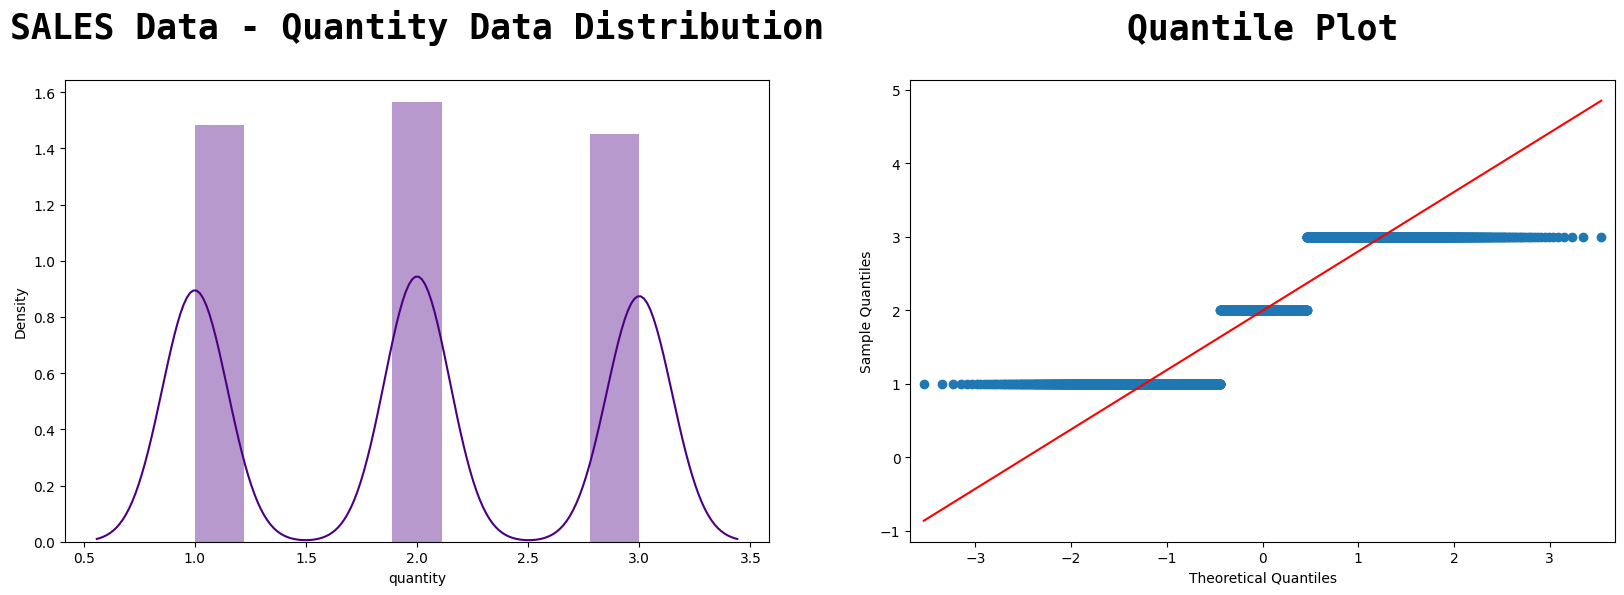

In [38]:
# Price per-unit Data
univariate_analysis( # call the function
    data=sales['quantity'], # put the data
    color='indigo', # pick the color
    title1='SALES Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

##Which products were sold the most in the last month?

In [39]:
(cop_data.groupby(["month_order", "product_type", "product_name"])["sales"] # groupping
        .sum() # sum
        .astype("int") # change the type
        .sort_values(ascending=False) # sort the values
        .to_frame() # change it into data frame
        .head(17) # look the first 17 rows
        ) # Transpose

,,,sales
month_order,product_type,product_name,
4,Shirt,Denim,63480
8,Jacket,Cardigan,54044
2,Shirt,Dress,52241
9,Trousers,Chinos,50500
1,Jacket,Shearling,49495
6,Shirt,Flannel,49152
1,Shirt,Polo,47970
9,Jacket,Leather,47573
1,Jacket,Leather,47121


In [40]:
(cop_data.groupby(["month_order", "product_type", "product_name"])["sales"] # groupping
        .sum() # sum
        .astype("int") # change the type
        .sort_values(ascending=False) # sort the values
        .to_frame() # change it into data frame
        .head(17) # look the first 17 rows
        .T)

month_order       4        8      2        9         1       6      1       9  \
product_type  Shirt   Jacket  Shirt Trousers    Jacket   Shirt  Shirt  Jacket   
product_name  Denim Cardigan  Dress   Chinos Shearling Flannel   Polo Leather   
sales         63480    54044  52241    50500     49495   49152  47970   47573   

month_order        1      6      3          7        1      6        7  \
product_type  Jacket  Shirt Jacket   Trousers Trousers Jacket    Shirt   
product_name Leather  Linen  Parka Drawstring    Cords Puffer Chambray   
sales          47121  46516  45696      45136    45087  43670    42945   

month_order                         8  
product_type   Jacket           Shirt  
product_name Pullover Mandarin Collar  
sales           42750           42660

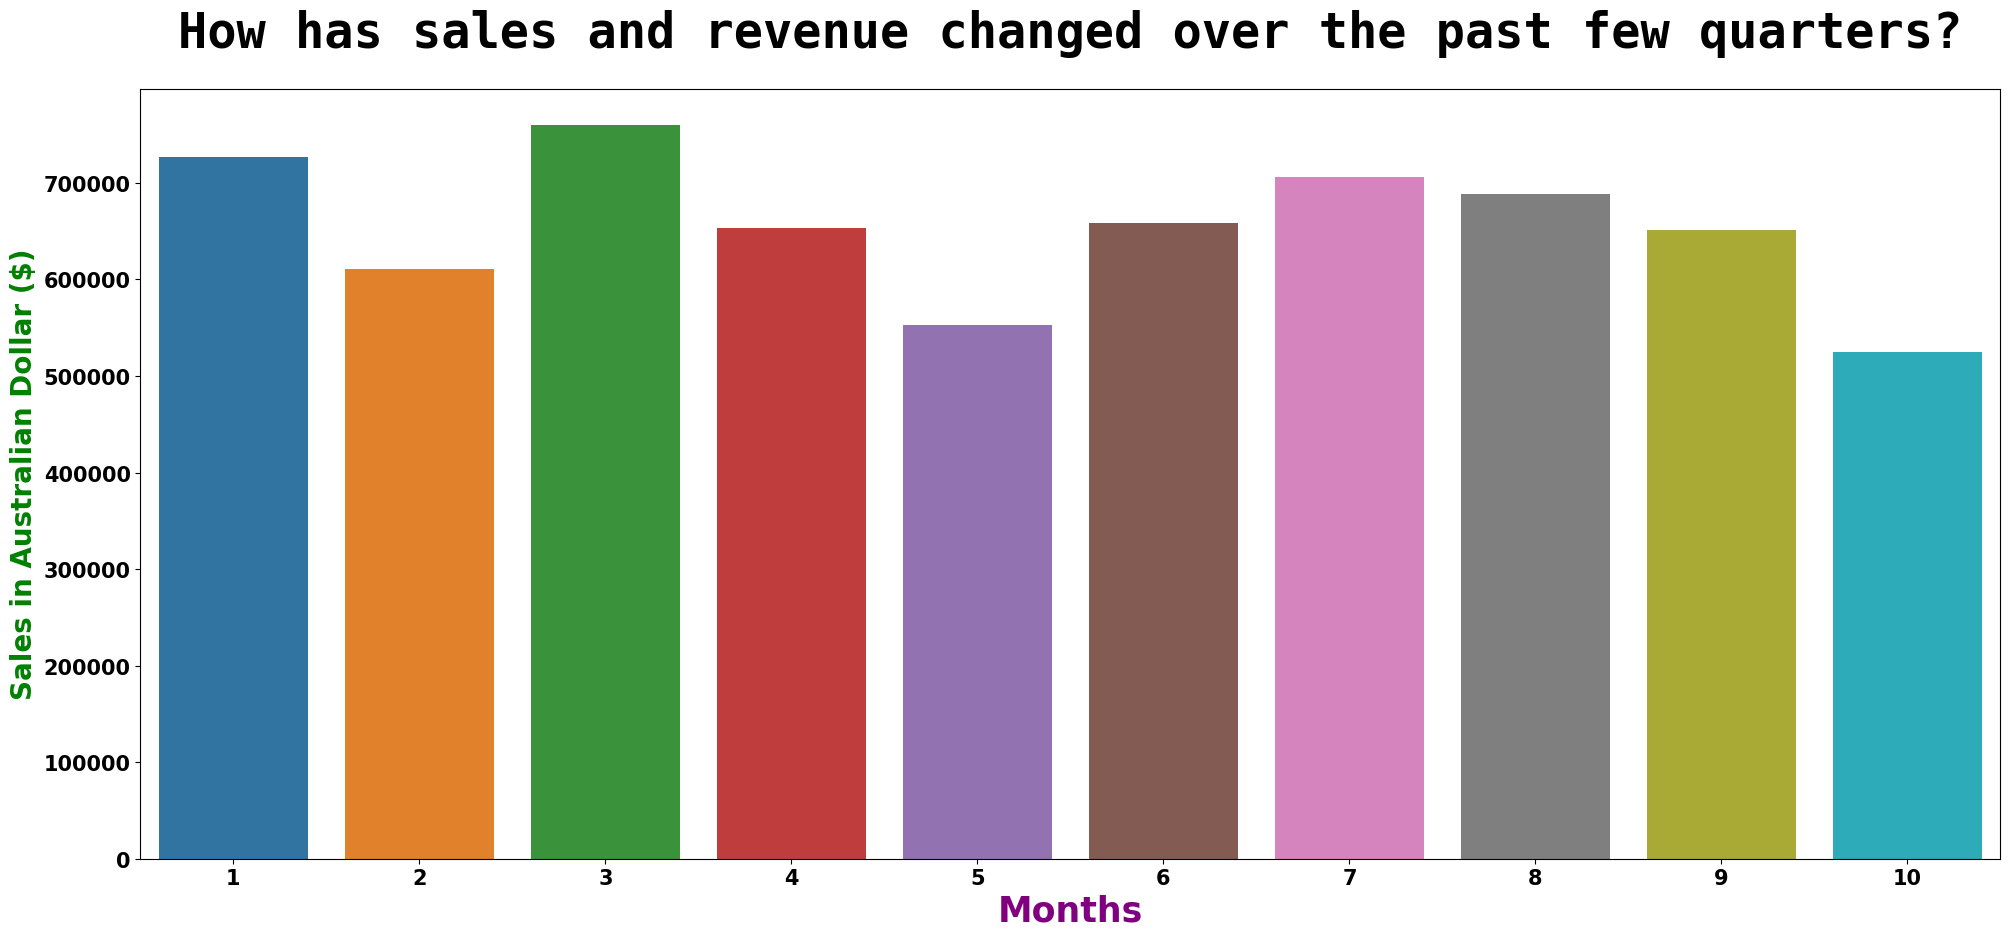

In [41]:
# group the Month cols
sum_month_order = cop_data.groupby(["month_order"]).sum().astype("int")
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot
sns.barplot(
    x=sum_month_order.index, # x-axis
    y=sum_month_order["sales"], # y-axis
    data=sum_month_order, # data
    # palette="deep" # palette
)
# title
plt.title(
    "How has sales and revenue changed over the past few quarters?",
    fontname="monospace", # fontname
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
# x-label
plt.xlabel( # x-label
    "Months",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in Australian Dollar ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

##Understanding Customer demographics and their preferences

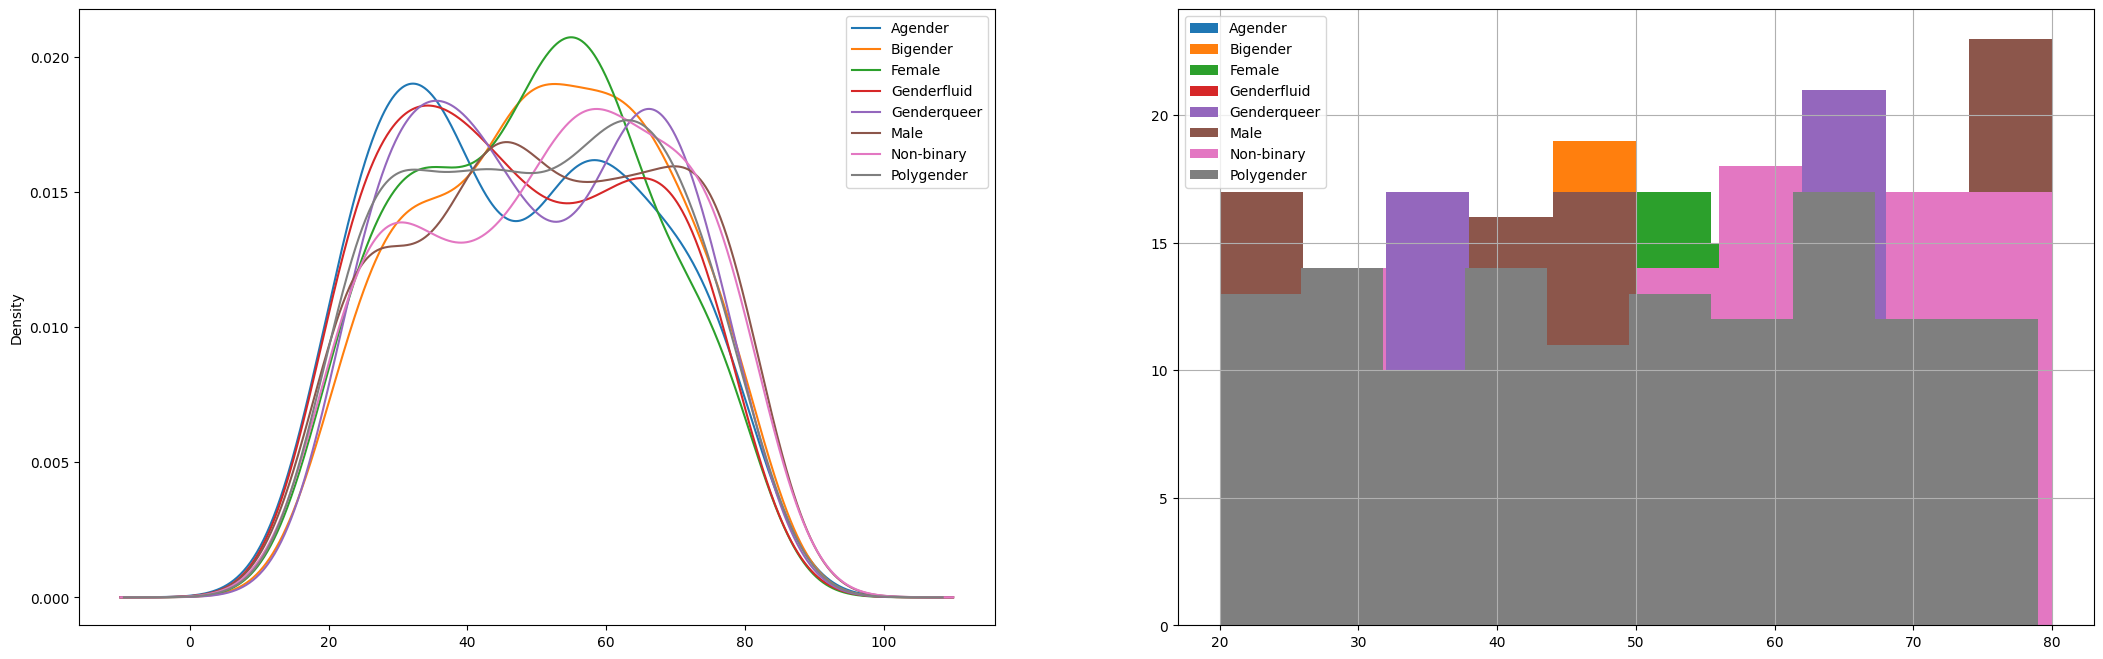

In [42]:
plt.figure(figsize=(26, 8)) # figure the size
plt.subplot(1, 2, 1) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.plot(kind='kde',legend=True); # group gender and plot it
plt.subplot(1, 2, 2) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.hist(legend=True); # group gender and plot it using hist plot

[Read more about the different types of gender here](https://teentalk.ca/learn-about/gender-identity/#:~:text=There%20are%20many%20different%20gender,identities%20then%20we've%20listed.)

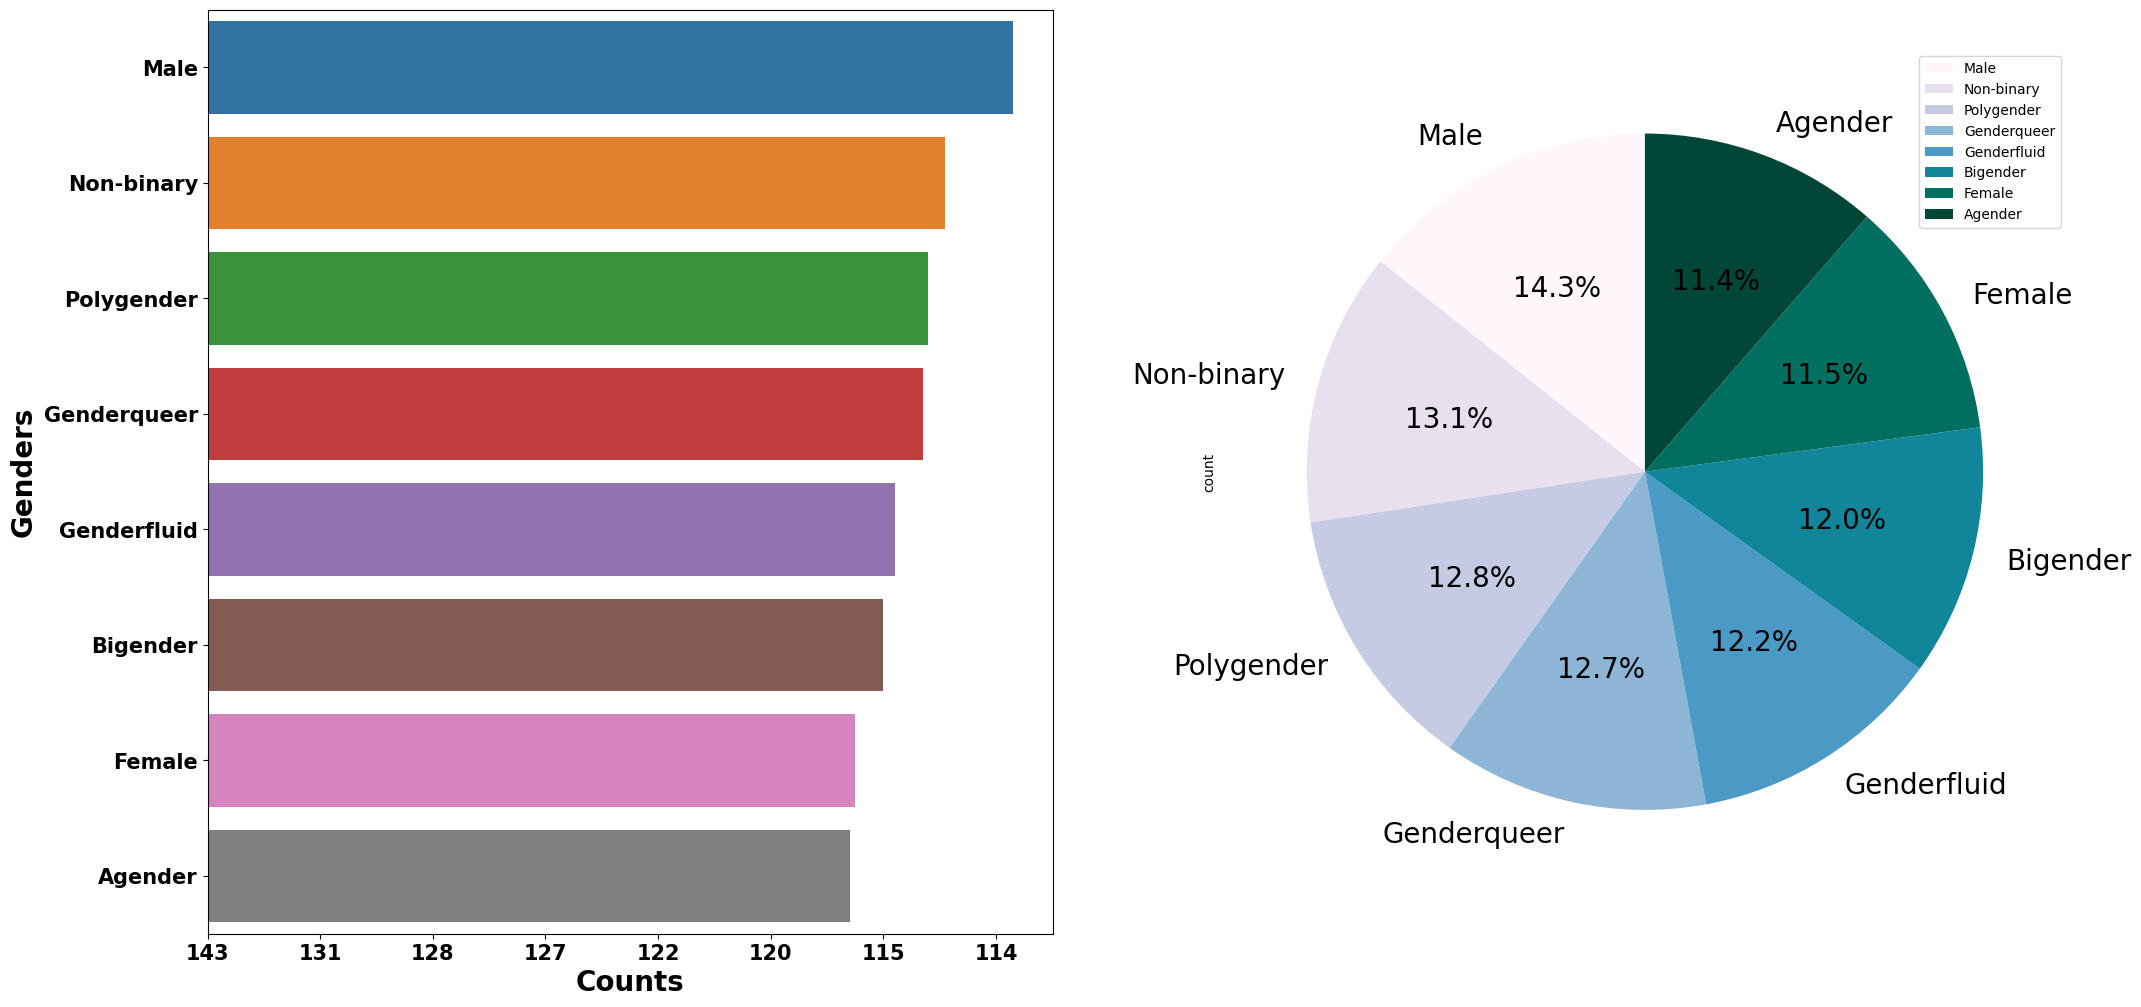

In [43]:
fig, (ax1, ax2) = plt.subplots( # subplots
    ncols=2, # n-cols
    nrows=1, # c-rows
    figsize=(24, 12) # figuring the size
)
sns.barplot( # barplot
    x=cop_data["gender"].value_counts().values, # x-axis
    y=cop_data["gender"].value_counts().index, # y-axis
    # palette="viridis", # palette
    ax=ax1 # axes
)
# Prepare data for Pie Plots
cop_pie = {"gender": ["Male", "Non-binary", "Polygender", "Genderqueer", "Genderfluid", "Bigender", "Female", "Agender"], # gender
           "count": [143, 131, 128, 127, 122, 120, 115, 114]} # count
cop_pie = pd.DataFrame(cop_pie)
cop_pie.plot( # plot
    kind="pie", # kind pie of course
    y="count", # y-axis
    labels=cop_pie["gender"], # the labels
    autopct='%1.1f%%', # pct
    startangle=90, # angle
    legend=True, # legend
    colormap=plt.cm.PuBuGn, # cmap
    fontsize=20, # fontsize
    textprops=dict(color="black"), # textprops
    ax=ax2 # axes
)
ax1.set_xlabel( # x-label
    "Counts",
    weight="bold", # weight
    fontsize=20 # font-size
)
ax1.set_xticklabels( # x-ticklabels
    labels=cop_pie["count"], # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
ax1.set_ylabel( # y-label
    "Genders",
    weight="bold", # weight
    fontsize=20 # font-size
)
ax1.set_yticklabels( # y-ticklabels
    labels=cop_pie["gender"], # labels
    weight="bold", # weight
    fontsize=15 # font-size
);

Quite suprising how male managed to shop more than females...lol

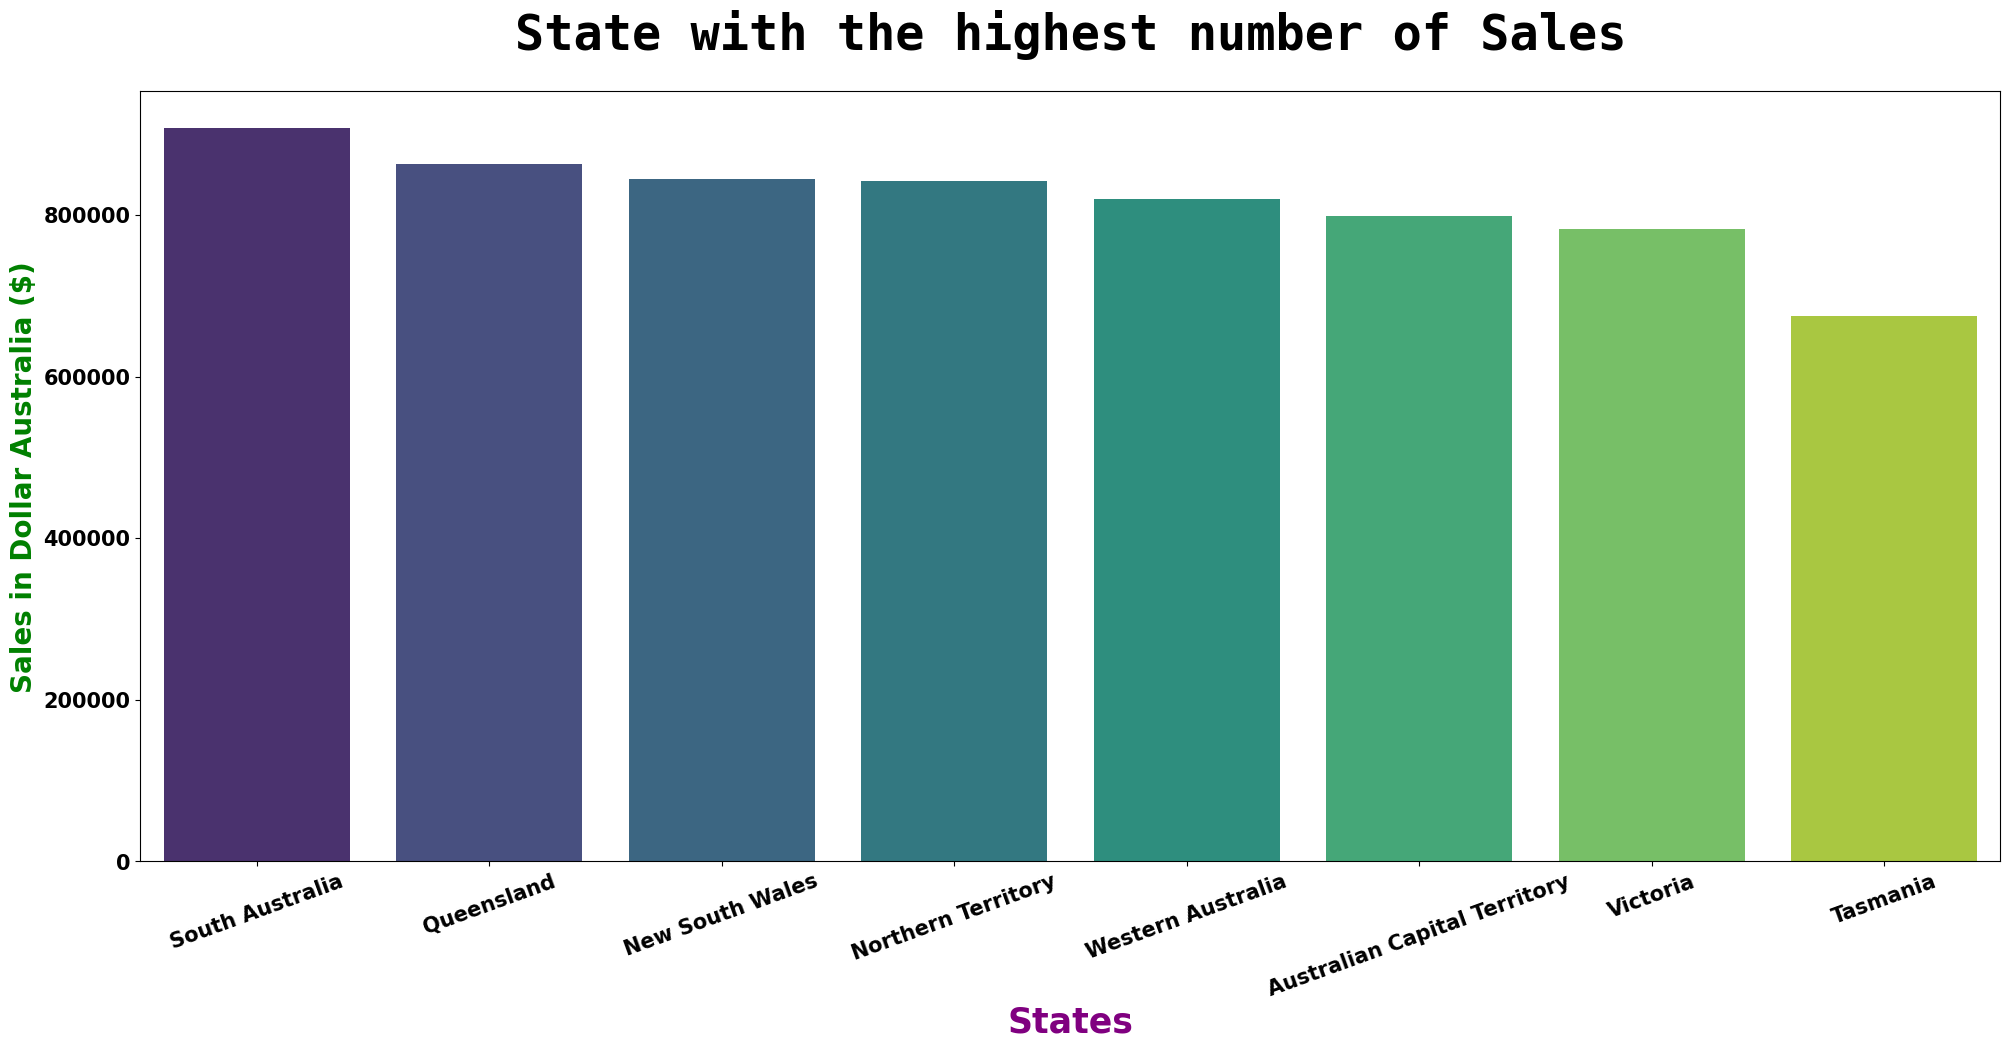

In [44]:
high_state_sales = (cop_data.groupby("state") # groupping
                           .sum() # sum
                           .astype("int")["sales"] # change type into int and get the sales features
                           .sort_values(ascending=False) # sort the values
                           .to_frame()) # change it into data frame
# let's plot it
plt.figure(dpi=100, figsize=(24, 10)) # figuring the size
# makes bar plot
sns.barplot( # barplot
    x=high_state_sales.index, # x-axis
    y="sales", # y-axis
    data=high_state_sales, # data
    palette="viridis" # palette (like cmap)
)
# title
plt.title( # title
    "State with the highest number of Sales",
    fontname="monospace", # font-name
    weight="bold", # weight
    fontsize=35, # the size of font
    pad=30 # padding
)
# x-label
plt.xlabel( # x-label
    "States",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # fontsiz
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=20 # rotate
)
plt.ylabel( # y-label
    "Sales in Dollar Australia ($)",
    weight="bold", # weight
    color="g", # color
    fontsize=20, # font-size
)
plt.yticks(  # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

**South Australia** took first place with the highest total sales of  907.400  (Dollar Australia), and **Queensland** took second place with sales of  862.965  (Dollar Australia).

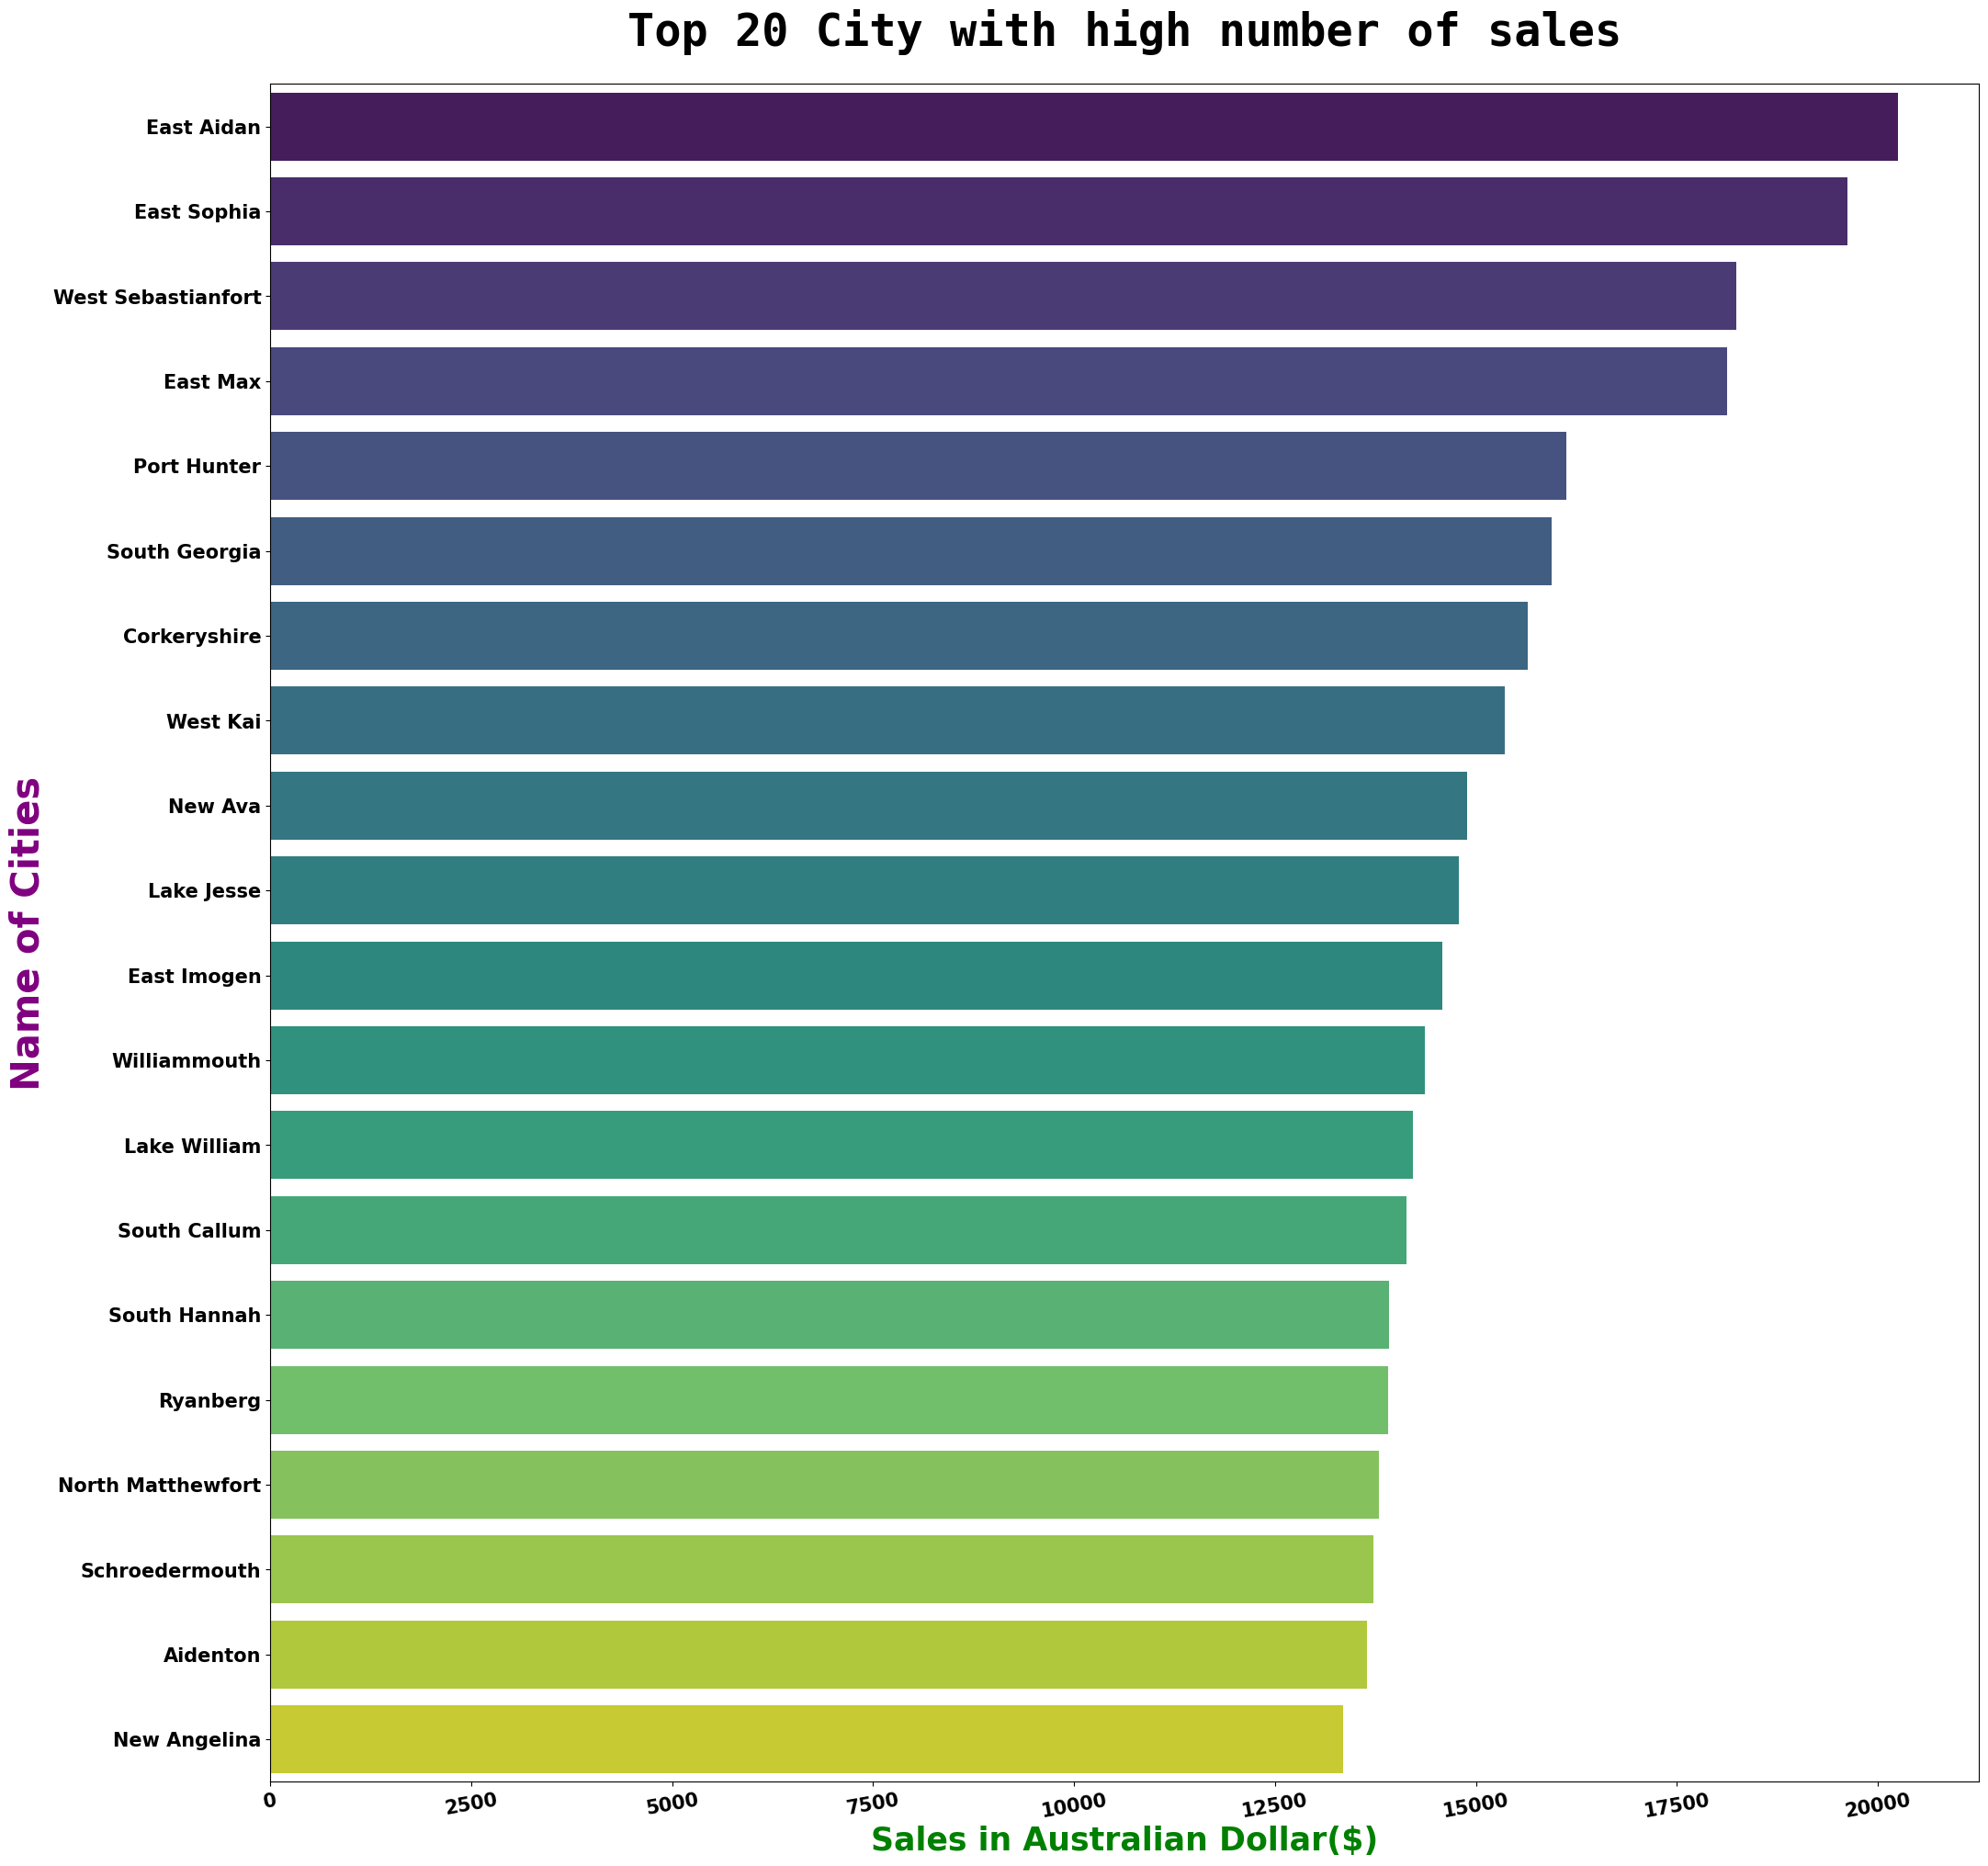

In [45]:
# group of the highest number of sales in city
top_20_city = (cop_data.groupby("city") # groupping
                      .sum() # sum
                      .astype("int")["sales"] # change type into int and get the sales features
                      .sort_values(ascending=False) # sort values
                      .head(20) # head
                      .to_frame()) # change it into data frame
# let's plot it
plt.figure(dpi=100, figsize=(24, 24)) # figuring the size
sns.barplot( # barplot
    x="sales", # x-axis
    y=top_20_city.index, # y-axis
    data=top_20_city, # data
    palette="viridis" # palette (colormap)
)
plt.title( # title
    "Top 20 City with high number of sales",
    fontname="monospace",  # font-name
    weight="bold",  # weight
    fontsize=35, # size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Sales in Australian Dollar($)",
    weight="bold", # weight
    color="g", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10 # rotation
)
plt.ylabel( # y-label
    "Name of Cities",
    weight="bold", # weight
    color="purple", # color
    fontsize=30, # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

**East Aidan** occupies the first position in the city with the highest number of sales with total sales of  20.247  (Dollar Australia), and the second position is occupied by **East Sophia** with total sales of  19.628  (Dollar Australia).